In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle kernels output ruslankl/eeg-data-analysis -p /path/to/dest'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu
import iisignature as sig

init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [9]:
#data import
filenames_list = os.listdir('SMNI_CMI_TRAIN/Train') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
print(len(filenames_list))
for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/' + file_name) ## read from the file to df
    EEG_data = EEG_data.append(temp_df) ## add the file data to the main df
    
EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1) ## remove the unused column
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name

468


100%|██████████| 468/468 [03:13<00:00,  2.41it/s]


In [10]:
#example try for create train set
temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/Data1.csv')
print(temp_df['subject identifier'][0])
print(temp_df["matching condition"][0])
print(np.array(temp_df["sensor value"]).reshape([64,256]))


a
S1 obj
[[ -8.921  -8.433  -2.574 ...   4.262   5.727   8.169]
 [  0.834   3.276   5.717 ...   2.787   9.623  13.041]
 [-19.847 -12.522   1.149 ...   7.009  11.403  12.868]
 ...
 [ -0.478  -0.966  -0.966 ...   4.405   3.916   2.94 ]
 [ -8.901  -7.924  -3.042 ...   4.771   6.236   8.677]
 [ -5.636  -2.706   1.689 ...  15.849  16.337  14.872]]


In [11]:
#S1: S1 obj - a single object shown;
s1 = 0
#S12: S2 nomatch - object 2 shown in a non matching condition (S1 differed from S2)
s12 = 0
#S21: S2 match - object 2 shown in a matching condition (S1 was identical to S2),
s21 = 0
s1_X_train = np.zeros((160,256,64))
s1_y_train = np.zeros(160)
s21_X_train = np.zeros((159,256,64))
s21_y_train = np.zeros(159)
s12_X_train = np.zeros((149,256,64))
s12_y_train = np.zeros(149)


classifier = {'a':1,'c':0}

filenames_list = os.listdir('SMNI_CMI_TRAIN/Train') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
print(len(filenames_list))
for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/' + file_name) ## read from the file to df
    if temp_df["matching condition"][0] == "S1 obj":
        s1_X_train[s1] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
        s1_y_train[s1] = classifier[temp_df['subject identifier'][0]]
        s1 += 1
    if temp_df["matching condition"][0] == "S2 match":
        s21_X_train[s21] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
        s21_y_train[s21] = classifier[temp_df['subject identifier'][0]]
        s21 += 1
    if temp_df["matching condition"][0] == "S2 nomatch,":
        s12_X_train[s12] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
        s12_y_train[s12] = classifier[temp_df['subject identifier'][0]]
        s12 += 1
print(s1)
print(s21)
print(s12)


468


100%|██████████| 468/468 [00:23<00:00, 19.70it/s]

160
159
149


In [12]:
#t1: S1 obj - a single object shown;
t1 = 0
#t12: S2 nomatch - object 2 shown in a non matching condition (S1 differed from S2)
t12 = 0
#t21: S2 match - object 2 shown in a matching condition (S1 was identical to S2),
t21 = 0
t1_X_test = np.zeros((160,256,64))
t1_y_test = np.zeros(160)
t21_X_test = np.zeros((160,256,64))
t21_y_test = np.zeros(160)
t12_X_test = np.zeros((160,256,64))
t12_y_test = np.zeros(160)


classifier = {'a':1,'c':0}

filenames_list = os.listdir('SMNI_CMI_TEST') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
print(len(filenames_list))
for file_name in tqdm(filenames_list):
    if file_name == "Test":
        pass
    else:
        temp_df = pd.read_csv('SMNI_CMI_TEST/' + file_name) ## read from the file to df
        if temp_df["matching condition"][0] == "S1 obj":
            t1_X_test[t1] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
            t1_y_test[t1] = classifier[temp_df['subject identifier'][0]]
            t1 += 1
        if temp_df["matching condition"][0] == "S2 match":
            t21_X_test[t21] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
            t21_y_test[t21] = classifier[temp_df['subject identifier'][0]]
            t21 += 1
        if temp_df["matching condition"][0] == "S2 nomatch,":
            t12_X_test[t12] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
            t12_y_test[t12] = classifier[temp_df['subject identifier'][0]]
            t12 += 1
print(t1)
print(t21)
print(t12)


481


100%|██████████| 481/481 [00:24<00:00, 19.28it/s]

160
160
160


In [35]:
def score_function(X_train, y_train, X_test, y_test, method, title, parameters = None,):
    if parameters == None:
        clf = method
    else:
        clf = method.set_params(**parameters)
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    y_pred = clf.predict(X_test)

    from plot_metric.functions import BinaryClassification
    import matplotlib.pyplot as plt
    # Visualisation with plot_metric
    from sklearn.metrics import accuracy_score
    bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 0", "Class 1"])
    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    plt.title(title)
    plt.show()
    score = accuracy_score(y_test, y_pred)
    print("score is " + str(score))

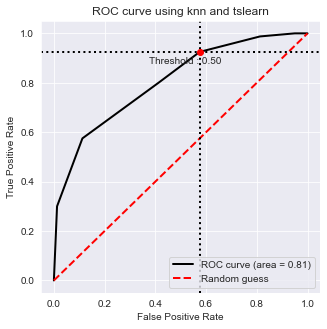

score is 0.675


In [36]:
parameters = {'n_neighbors': 7}
title = "ROC curve using knn and tslearn"
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
score_function(s1_X_train,s1_y_train,t1_X_test,t1_y_test,
               KNeighborsTimeSeriesClassifier(),title,parameters)

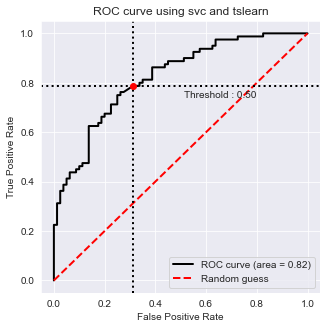

score is 0.725


In [39]:
parameters = {'C':1.0, 'kernel':"gak",'probability':True}
title = "ROC curve using svc and tslearn"
from tslearn.svm import TimeSeriesSVC
score_function(s1_X_train,s1_y_train,t1_X_test,t1_y_test,
               TimeSeriesSVC(),title,parameters)

In [20]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tqdm import tqdm
for i in tqdm(range(3,20)):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i, n_jobs=10)
    knn.fit(s1_X_train, s1_y_train)
    print(knn.score(t1_X_test,t1_y_test))

  6%|▌         | 1/17 [00:37<09:57, 37.34s/it]

0.65625


 12%|█▏        | 2/17 [01:11<08:54, 35.60s/it]

0.6875


 18%|█▊        | 3/17 [01:50<08:36, 36.91s/it]

0.66875


 24%|██▎       | 4/17 [02:34<08:37, 39.80s/it]

0.69375


 29%|██▉       | 5/17 [03:20<08:24, 42.08s/it]

0.675


 35%|███▌      | 6/17 [04:04<07:50, 42.75s/it]

0.675


 41%|████      | 7/17 [04:46<07:05, 42.55s/it]

0.69375


 47%|████▋     | 8/17 [05:29<06:23, 42.66s/it]

0.69375


 53%|█████▎    | 9/17 [06:12<05:41, 42.71s/it]

0.6625


 59%|█████▉    | 10/17 [06:56<05:02, 43.14s/it]

0.675


 65%|██████▍   | 11/17 [07:35<04:11, 41.95s/it]

0.6375


 71%|███████   | 12/17 [08:13<03:23, 40.67s/it]

0.675


 76%|███████▋  | 13/17 [08:52<02:40, 40.08s/it]

0.65625


 82%|████████▏ | 14/17 [09:31<01:59, 39.85s/it]

0.68125


 88%|████████▊ | 15/17 [10:11<01:19, 39.79s/it]

0.64375


 94%|█████████▍| 16/17 [10:50<00:39, 39.54s/it]

0.69375


100%|██████████| 17/17 [11:34<00:00, 40.84s/it]

0.65625


In [19]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak", n_jobs=10)
clf.fit(s1_X_train, s1_y_train)
print(clf.score(t1_X_test, t1_y_test))

0.73125


In [20]:
s1_sig_train = sig.sig(s1_X_train, 2)
s1_sig_test = sig.sig(t1_X_test, 2)

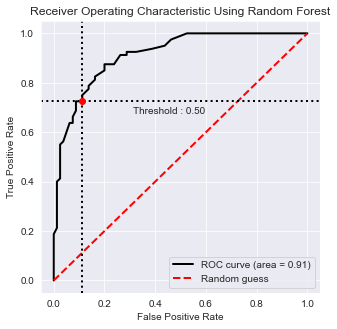

score is 0.81875


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Random Forest")
plt.show()
score = accuracy_score(t1_y_test, y_pred)
print("score is " + str(score))


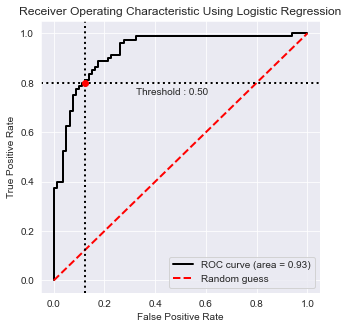

score is 0.84375


In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = accuracy_score(t1_y_test, y_pred)
print("score is " + str(score))


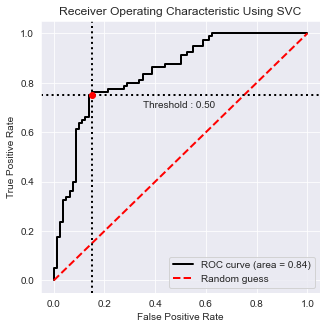

score is 0.79375


In [23]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using SVC")
plt.show()
score = accuracy_score(t1_y_test, y_pred)
print("score is " + str(score))

In [24]:
from sklearn.neighbors import KNeighborsClassifier
for i in tqdm(range(3,20)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(s1_sig_train, s1_y_train)
    y_pred = knn.predict(s1_sig_test)
    print(accuracy_score(t1_y_test, y_pred))

  6%|▌         | 1/17 [00:00<00:01,  9.19it/s]

0.7625
0.75
0.75
0.75
0.73125
0.74375
0.7625
0.75625
0.7625


100%|██████████| 17/17 [00:00<00:00, 65.66it/s]

0.75625
0.7625
0.75625
0.76875
0.7625
0.75625
0.74375
0.75625


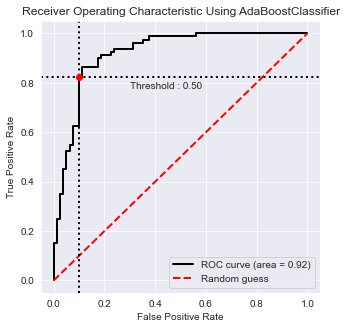

score is 0.85


In [25]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using AdaBoostClassifier")
plt.show()
score = accuracy_score(t1_y_test, y_pred)
print("score is " + str(score))

In [26]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tqdm import tqdm
for i in tqdm(range(3,20)):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i, n_jobs=12)
    knn.fit(s12_X_train, s12_y_train)
    print(knn.score(t12_X_test,t12_y_test))

  6%|▌         | 1/17 [00:06<01:37,  6.07s/it]

0.73125


 12%|█▏        | 2/17 [00:12<01:30,  6.06s/it]

0.775


 18%|█▊        | 3/17 [00:18<01:24,  6.05s/it]

0.69375


 24%|██▎       | 4/17 [00:24<01:18,  6.05s/it]

0.75


 29%|██▉       | 5/17 [00:30<01:12,  6.05s/it]

0.71875


 35%|███▌      | 6/17 [00:36<01:06,  6.05s/it]

0.725


 41%|████      | 7/17 [00:42<01:00,  6.06s/it]

0.6875


 47%|████▋     | 8/17 [00:48<00:54,  6.05s/it]

0.7125


 53%|█████▎    | 9/17 [00:54<00:48,  6.07s/it]

0.675


 59%|█████▉    | 10/17 [01:00<00:42,  6.06s/it]

0.6875


 65%|██████▍   | 11/17 [01:06<00:36,  6.05s/it]

0.6625


 71%|███████   | 12/17 [01:12<00:30,  6.05s/it]

0.68125


 76%|███████▋  | 13/17 [01:18<00:24,  6.05s/it]

0.675


 82%|████████▏ | 14/17 [01:24<00:18,  6.04s/it]

0.675


 88%|████████▊ | 15/17 [01:30<00:12,  6.06s/it]

0.65


 94%|█████████▍| 16/17 [01:36<00:06,  6.05s/it]

0.66875


100%|██████████| 17/17 [01:42<00:00,  6.05s/it]

0.65625


In [27]:
from tslearn.svm import TimeSeriesSVC
import datetime
start = datetime.datetime.now()
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(s12_X_train, s12_y_train)
score = clf.score(t12_X_test, t12_y_test)
end = datetime.datetime.now()
print(score)
print(end-start)

0.84375
0:01:16.171223


In [28]:
s12_sig_train = sig.sig(s12_X_train, 2)
s12_sig_test = sig.sig(t12_X_test, 2)

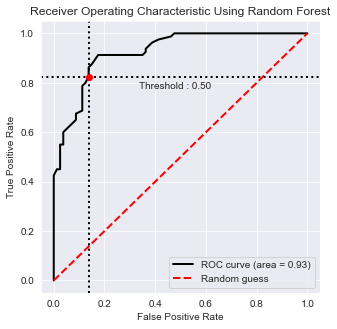

score is 0.8375
0:00:00.278796


In [29]:
from sklearn.ensemble import RandomForestClassifier
start = datetime.datetime.now()
clf = RandomForestClassifier()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Random Forest")
plt.show()
score = accuracy_score(t12_y_test, y_pred)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)


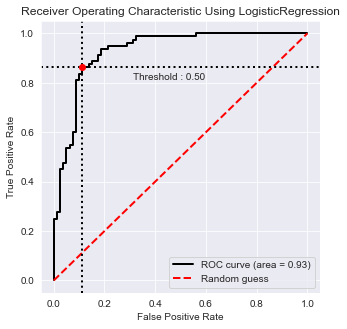

score is 0.86875
0:00:00.129591


In [30]:
from sklearn.linear_model import LogisticRegression
start = datetime.datetime.now()
clf = LogisticRegression()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using LogisticRegression")
plt.show()
score = accuracy_score(t12_y_test, y_pred)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

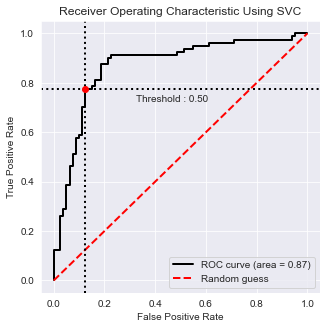

score is 0.825
0:00:00.212193


In [31]:
from sklearn.svm import SVC
start = datetime.datetime.now()
clf = SVC(probability = True)
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using SVC")
plt.show()
score = accuracy_score(t12_y_test, y_pred)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
for i in tqdm(range(3,20)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(s12_sig_train, s12_y_train)
    y_pred = knn.predict(s12_sig_test)
    print(accuracy_score(t12_y_test, y_pred))

100%|██████████| 17/17 [00:00<00:00, 108.88it/s]

0.7625
0.75625
0.7625
0.7625
0.775
0.7625
0.76875
0.7625
0.76875
0.7625
0.7875
0.775
0.76875
0.7625
0.78125
0.76875
0.775


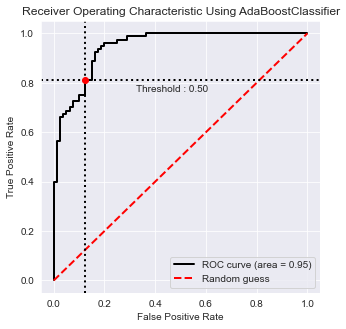

score is 0.825
0:00:01.872438


In [33]:
from sklearn.ensemble import AdaBoostClassifier
start = datetime.datetime.now()
clf = AdaBoostClassifier()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using AdaBoostClassifier")
plt.show()
score = accuracy_score(t12_y_test, y_pred)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

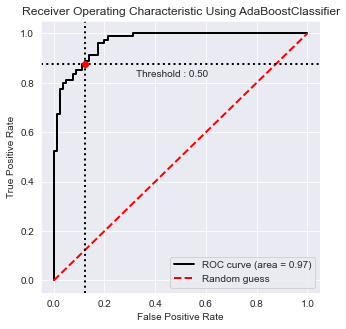

score is 0.875
0:00:07.244595


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
start = datetime.datetime.now()
clf = GradientBoostingClassifier()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score
bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using AdaBoostClassifier")
plt.show()
score = accuracy_score(t12_y_test, y_pred)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)